### Чтение данных

In [1]:
import numpy as  np
import pandas as pd
import pandas
from matplotlib import pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
art_data = pandas.read_csv("./TestDataSource/art.csv", sep = ';')
sales_data = pandas.read_csv("./TestDataSource/sales.csv", sep = ';')
store_data = pandas.read_csv("./TestDataSource/store.csv", sep = ';')
txt_data = pandas.read_csv("./TestDataSource/txn.csv", sep = ';')

## №1 

Рассчитать основные показатели: Средний чек магазина, ср. кол-во чеков на 1 магазин. в день, ср. продажи на 1 магазин. в день (детализация до товара/группы не нужна). Сравнить эти показатели в октябре и ноябре между магазинами. Визуально представить результат.

In [10]:
sales_data = sales_data.replace({',': '.'}, regex=True)
txt_data = txt_data.replace({',': '.'}, regex=True)

In [11]:
sales_data[[ 'SALES']] = sales_data[[ 'SALES']].apply(pd.to_numeric)
txt_data[['SALES']] = txt_data[[ 'SALES']].apply(pd.to_numeric)

In [20]:
txt_data.DAY.unique()

array(['2015-11-05', '2015-10-24', '2015-10-29', '2015-10-04',
       '2015-11-11', '2015-10-21', '2015-10-03', '2015-10-05',
       '2015-11-24', '2015-11-02', '2015-10-19', '2015-11-23',
       '2015-11-28', '2015-10-15', '2015-10-13', '2015-10-20',
       '2015-10-14', '2015-11-03', '2015-11-18', '2015-10-31',
       '2015-11-19', '2015-10-17', '2015-11-06', '2015-11-22',
       '2015-11-04', '2015-10-25', '2015-11-21', '2015-11-01',
       '2015-11-15', '2015-11-20', '2015-10-23', '2015-11-10',
       '2015-10-01', '2015-11-16', '2015-11-12', '2015-10-02',
       '2015-11-13', '2015-11-09', '2015-11-27', '2015-10-06',
       '2015-10-18', '2015-10-27', '2015-11-25', '2015-10-07',
       '2015-10-12', '2015-10-26', '2015-10-09', '2015-11-17',
       '2015-11-14', '2015-10-28', '2015-10-22', '2015-10-11',
       '2015-10-10', '2015-11-26', '2015-11-08', '2015-10-08',
       '2015-11-07', '2015-11-29', '2015-10-16', '2015-10-30'], dtype=object)

In [24]:
mean_check = pd.merge(
txt_data[txt_data.DAY <  '2015-11-01'].groupby(['TXN', 'STORE'], as_index=False)['SALES'].sum().groupby('STORE').mean(), 
txt_data[txt_data.DAY >= '2015-11-01'].groupby(['TXN', 'STORE'], as_index=False)['SALES'].sum().groupby('STORE').mean(), 
                      left_index=True, right_index=True)
mean_check.drop(['TXN_x','TXN_y'], axis =1, inplace = True)

In [26]:
mean_check.columns = ['Окт', 'Нояб']

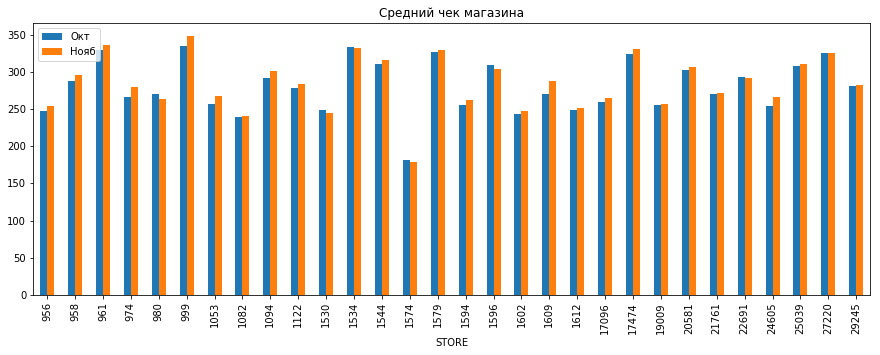

In [27]:
mean_check.plot.bar(title = 'Средний чек магазина', figsize = (15,5))

Средний чек в ноябре больше чем в октябре

In [29]:
mean_check = pd.merge(
txt_data[txt_data.DAY <  '2015-11-01'].groupby(['TXN', 'STORE', 'DAY'], as_index=False)['SALES'].count().groupby(['STORE', 'DAY'], as_index=False).count().groupby('STORE').mean(), 
txt_data[txt_data.DAY >= '2015-11-01'].groupby(['TXN', 'STORE', 'DAY'], as_index=False)['SALES'].count().groupby(['STORE', 'DAY'], as_index=False).count().groupby('STORE').mean(), 
                      left_index=True, right_index=True)

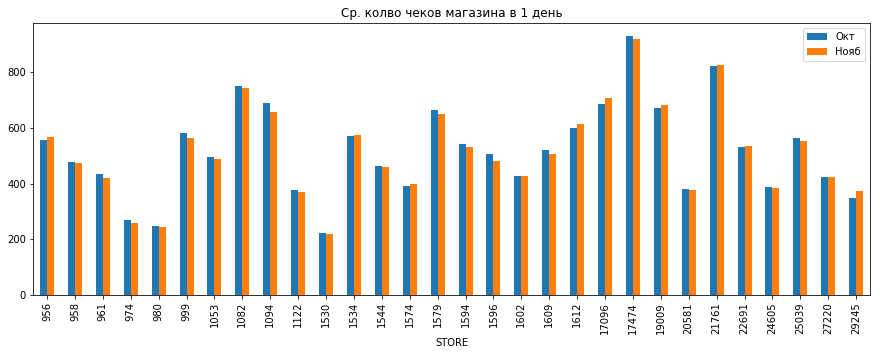

In [30]:
mean_check.drop(['TXN_x','TXN_y'], axis =1, inplace = True)
mean_check.columns = ['Окт', 'Нояб']
mean_check.plot.bar(title = 'Ср. колво чеков магазина в 1 день', figsize = (15,5))

In [ ]:
Ср. колво чеков при этом оказывается в октябре больше

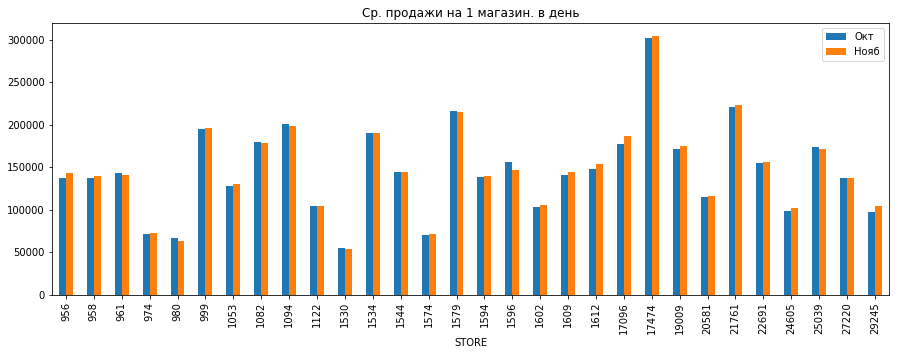

In [31]:
# ср. продажи на 1 магазин. в день
mean_check = pd.merge(
txt_data[txt_data.DAY <  '2015-11-01'].groupby(['TXN', 'STORE', 'DAY'], as_index=False)['SALES'].sum().groupby(['STORE', 'DAY'], as_index=False).sum().groupby('STORE').mean(), 
txt_data[txt_data.DAY >= '2015-11-01'].groupby(['TXN', 'STORE', 'DAY'], as_index=False)['SALES'].sum().groupby(['STORE', 'DAY'], as_index=False).sum().groupby('STORE').mean(), 
                      left_index=True, right_index=True)
mean_check.drop(['TXN_x','TXN_y'], axis =1, inplace = True)
mean_check.columns = ['Окт', 'Нояб']
mean_check.plot.bar(title = 'Ср. продажи на 1 магазин. в день', figsize = (15,5))

Средние продажи по магазинам однозначной разницы в сумме продаж от месяца к месяцу нет, нужен дополнительный анализ

## №2

АВС-анализ. Требуется определить минимальный набор товаров (итого по всем магазинам в рамках каждой группы), дающий не менее 50% от объема продаж (категория А) и 80% от объема продаж (А+В). Представить результат в виде таблиц.

Анализ будет проведен по продажам в ноябре

In [346]:
topitems = pd.merge(sales_data, art_data, how = 'inner')

In [347]:
topitems = topitems.groupby(['ART','NAME', 'GRP'], as_index = False).sum()
topitems.head()
topitems.drop(['STORE'], axis =1, inplace = True)

In [348]:
topitems.sort_values(by = ['GRP','SALES'], ascending = [True, False], inplace = True)

In [349]:
topitems.head()

,ART,NAME,GRP,SALES
5034,16336697,Стеклоомывающая жидкость_1,Автотовары,"5,317.20"
3746,354914,Влажные салфетки для салона_1,Автотовары,"1,683.00"
4026,15273221,Тосол А-40_1,Автотовары,"1,399.60"
2144,251441,Силиконовая смазка_1,Автотовары,856.00
2205,259079,Масло моторное_1,Автотовары,588.00


In [43]:
pd.options.display.float_format = '{:,.2f}'.format

In [351]:
cum_sums = topitems.groupby(['GRP'], as_index = False).cumsum()
cum_sums.drop('ART', axis = 1, inplace = True)
cum_sums.columns = ['CumSum']

In [352]:
cum_sums = pd.merge(cum_sums, topitems, left_index=True, right_index=True)

In [353]:
cum_sums['GRP_sum'] = cum_sums.groupby('GRP').SALES.transform(np.sum)

In [354]:
cum_sums['prop_sum'] = 1.*cum_sums.CumSum/cum_sums.GRP_sum

In [356]:
a_min_group = cum_sums[cum_sums.prop_sum >= 0.5][['GRP','prop_sum' ]].groupby('GRP', as_index = False).min()
a_min_group.columns = ['GRP', 'min_prop50']
cum_sums = pd.merge(cum_sums, a_min_group)

In [357]:
a_min_group = cum_sums[cum_sums.prop_sum >= 0.8][['GRP','prop_sum' ]].groupby('GRP', as_index = False).min()
a_min_group.columns = ['GRP', 'min_prop80']
cum_sums = pd.merge(cum_sums, a_min_group)

In [364]:
cum_sums[cum_sums.prop_sum <= cum_sums.min_prop50][['GRP', 'NAME', 'SALES']]

,GRP,NAME,SALES
0,Автотовары,Стеклоомывающая жидкость_1,"5,317.20"
1,Автотовары,Влажные салфетки для салона_1,"1,683.00"
2,Автотовары,Тосол А-40_1,"1,399.60"
31,Аксесс. для животных,Пластиковая посуда_1,128.00
33,Аксессуары,Кусачки_1,609.80
34,Аксессуары,Набор маникюрн 4пр/блист СЛ(СИ)_1,420.00
35,Аксессуары,Щетка_1,410.00
36,Аксессуары,Набор_1,408.00
43,Апельсины,Апельсины_1,"254,020.94"
44,БАДы,Гематоген_1,"3,060.00"


In [365]:
cum_sums[cum_sums.prop_sum <= cum_sums.min_prop80][['GRP', 'NAME', 'SALES']]

,GRP,NAME,SALES
0,Автотовары,Стеклоомывающая жидкость_1,"5,317.20"
1,Автотовары,Влажные салфетки для салона_1,"1,683.00"
2,Автотовары,Тосол А-40_1,"1,399.60"
3,Автотовары,Силиконовая смазка_1,856.00
4,Автотовары,Масло моторное_1,588.00
5,Автотовары,Универсальная микрофибра_1,559.30
6,Автотовары,Губки для мытья автомобиля_1,410.00
7,Автотовары,Освежитель клеящийся_1,408.00
8,Автотовары,Накидка на сидение авто_1,379.90
9,Автотовары,Салфетки для ухода за авто_1,376.00


## №3
Восстановить данные за 2015-11-30. Рассчитать показатели из п.1 за этот день.

In [3]:
txt_data = pandas.read_csv("./TestDataSource/txn.csv", sep = ';')
txt_data = txt_data.replace({',': '.'}, regex=True)
txt_data[['SALES']] = txt_data[[ 'SALES']].apply(pd.to_numeric)

In [9]:
txt_data = txt_data.groupby(['STORE', 'DAY'], as_index=False)['SALES'].sum()
txt_data.sort_values(by = ['STORE','DAY'],  inplace = True)

In [5]:
txt_data.STORE.unique()

array([  956,   958,   961,   974,   980,   999,  1053,  1082,  1094,
        1122,  1530,  1534,  1544,  1574,  1579,  1594,  1596,  1602,
        1609,  1612, 17096, 17474, 19009, 20581, 21761, 22691, 24605,
       25039, 27220, 29245], dtype=int64)

([<matplotlib.axis.XTick at 0x18a925f8>,
 <a list of 2 Text xticklabel objects>)

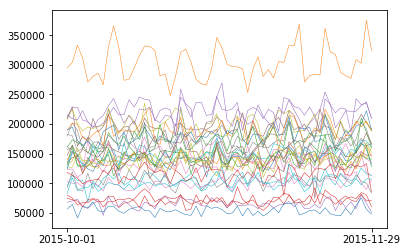

In [30]:
for store in txt_data.STORE.unique():
    plt.plot(txt_data[txt_data.STORE == store].DAY, txt_data[txt_data.STORE == store].SALES, linewidth=0.5)
t = [txt_data['DAY'].min(), txt_data['DAY'].max()]
plt.xticks(t,t)    

Есть явная понедельная сезонность. Отдельно можно строить логреги по исходным данным + доп признакам, но остановимся на простом baseline'e - значение 6 дней назад от последнего

Восстановить данные за 2015-11-30

#### Продажи на 1 магазин. в день

In [46]:
print('STORE 2015-11-30 SALES\n')
for store in txt_data.STORE.unique():
    print( store, txt_data[(txt_data.STORE == store) & (txt_data.DAY == '2015-11-24')].SALES.sum())

STORE 2015-11-30 SALES

956 138097.6376999991
958 120463.63019999949
961 129927.52789999936
974 73465.45630000009
980 58727.30310000014
999 179877.16569999803
1053 107221.84429999952
1082 176887.59619999863
1094 185422.57599999837
1122 108338.5463999994
1530 57895.57610000014
1534 180873.3381999984
1544 132282.75659999927
1574 78617.09690000006
1579 222552.93299999757
1594 124272.34659999935
1596 167393.94239999904
1602 106639.09409999945
1609 129811.83229999918
1612 144936.32789999884
17096 190296.60439999792
17474 281815.32659999776
19009 170627.41549999808
20581 114621.32649999966
21761 225450.04259999737
22691 144413.8100999989
24605 101909.40099999969
25039 171788.65399999867
27220 130878.72749999909
29245 94566.52399999979


Средний чек магазина, ср. кол-во чеков на 1 магазин. в день, ср. продажи на 1 магазин. в день

In [48]:
txt_data = pandas.read_csv("./TestDataSource/txn.csv", sep = ';')
txt_data = txt_data.replace({',': '.'}, regex=True)
txt_data[['SALES']] = txt_data[[ 'SALES']].apply(pd.to_numeric)

In [50]:
mean_check = txt_data.groupby(['TXN', 'STORE', 'DAY'], as_index=False)['SALES'].count().groupby(['STORE', 'DAY'], as_index=False).count()
mean_check.sort_values(by = ['STORE','DAY'],  inplace = True)
mean_check.drop('SALES', axis = 1, inplace = True)

([<matplotlib.axis.XTick at 0x22c87c50>,
 <a list of 2 Text xticklabel objects>)

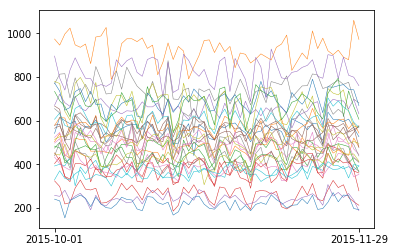

In [52]:
for store in mean_check.STORE.unique():
    plt.plot(mean_check[mean_check.STORE == store].DAY, mean_check[mean_check.STORE == store].TXN, linewidth=0.5)
t = [mean_check['DAY'].min(), mean_check['DAY'].max()]
plt.xticks(t,t)    

#### Колво чеков

In [53]:
print('STORE 2015-11-30 TXN\n')
for store in mean_check.STORE.unique():
    print( store, mean_check[(mean_check.STORE == store) & (mean_check.DAY == '2015-11-24')].TXN.sum())

STORE 2015-11-30 TXN

956 606
958 451
961 424
974 326
980 254
999 571
1053 467
1082 771
1094 726
1122 396
1530 270
1534 585
1544 485
1574 480
1579 698
1594 579
1596 576
1602 463
1609 533
1612 666
17096 753
17474 902
19009 763
20581 403
21761 898
22691 512
24605 409
25039 629
27220 394
29245 376


#### Средний чек

In [58]:
mean_check = txt_data.groupby(['TXN', 'STORE', 'DAY'], as_index=False)['SALES'].sum().groupby(['STORE', 'DAY'], as_index=False).mean()
mean_check.sort_values(by = ['STORE','DAY'],  inplace = True)
mean_check.drop('TXN', axis = 1, inplace = True)
print('STORE 2015-11-30 SALES\n')
for store in mean_check.STORE.unique():
    print( store, mean_check[(mean_check.STORE == store) & (mean_check.DAY == '2015-11-24')].SALES.sum())

STORE 2015-11-30 SALES

956 227.88389059405893
958 267.10339290465623
961 306.4328488207544
974 225.354160429448
980 231.20985472440967
999 315.02130595446584
1053 229.5970970021411
1082 229.42619481193225
1094 255.40299724517845
1122 273.5821878787878
1530 214.42805962962984
1534 309.18519350427346
1544 272.74795175257725
1574 163.78561854166662
1579 318.8437435530081
1594 214.63272297063895
1596 290.61448333333306
1602 230.32201749460035
1609 243.5494039399623
1612 217.62211396396367
17096 252.7179341301456
17474 312.43384323725013
19009 223.62701900393165
20581 284.4201650124068
21761 251.05795389754934
22691 282.05822285156245
24605 249.16723960880174
25039 273.1139173290935
27220 332.17951142131966
29245 251.5067127659572


PS Можно отдельно поработать над репрезентацией данных

Так или иначе предоставленное решение является базовым.

### №4
Провести факторный анализ значимости дня недели для объема продаж.


In [23]:
txt_data = txt_data.replace({',': '.'}, regex=True)
txt_data[['SALES']] = txt_data[[ 'SALES']].apply(pd.to_numeric)
tran_group = txt_data.groupby(['TXN', 'STORE', 'DAY'], as_index=False)['SALES'].sum().groupby(['STORE', 'DAY'], as_index=False).sum()
tran_group['DAY'] = pd.to_datetime(tran_group['DAY'])

In [24]:
tran_group['weekday'] = tran_group.DAY.dt.dayofweek

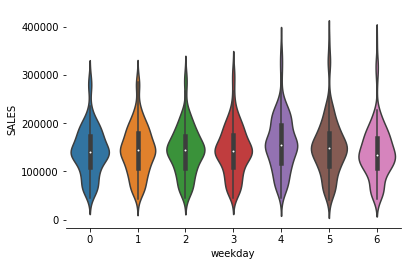

In [27]:
# Draw a nested violinplot and split the violins for easier comparison
sn.violinplot(x="weekday", y="SALES" , data=tran_group) #, palette={"Male": "b", "Female": "y"}
sn.despine(left=True)

Визуальный анализ показывает, что для объема продаж значимости дня недели нет. Таким образом, решение в п.3  не совсем корректно. Тем неменее оставим его в текущем виде. 

Посмотрим на доверительные интервалы (95% двухсторонняя альтернатива):

In [45]:
import math
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [44]:
for weekday in range(0,7):
    print( weekday, _tconfint_generic(tran_group[tran_group.weekday == weekday].SALES.mean(), tran_group[tran_group.weekday == weekday].SALES.std(ddof=1)/math.sqrt(len(tran_group[tran_group.weekday == weekday].SALES)),
                         len(tran_group[tran_group.weekday == weekday].SALES) - 1, 0.05, 'two-sided'))

0 (136010.45078603461, 148725.90683563173)
1 (138436.57956008855, 151447.14182074458)
2 (136976.02668791413, 149729.53737541902)
3 (138296.54449136811, 150797.34295752045)
4 (151527.70545600462, 165356.40141288415)
5 (143296.36525236219, 157187.18341726737)
6 (133698.73432556959, 146762.70920331898)


Построеннные доверительные интервалы подтверждают гипотезу о независимости продаж и .

В рамках дальнейшего анализа можно посмотреть завимость дня недели по разным товарам/групп товаров и разрезе определенных магазинов

## №5

Apriori Algorithm - наше всё